In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz

In [3]:
data = pd.read_csv('HEART.csv')


In [4]:
print(data)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [5]:
df = pd.DataFrame(data)

print(df.head(15))

    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    40   M           ATA        140          289          0     Normal   
1    49   F           NAP        160          180          0     Normal   
2    37   M           ATA        130          283          0         ST   
3    48   F           ASY        138          214          0     Normal   
4    54   M           NAP        150          195          0     Normal   
5    39   M           NAP        120          339          0     Normal   
6    45   F           ATA        130          237          0     Normal   
7    54   M           ATA        110          208          0     Normal   
8    37   M           ASY        140          207          0     Normal   
9    48   F           ATA        120          284          0     Normal   
10   37   F           NAP        130          211          0     Normal   
11   58   M           ATA        136          164          0         ST   
12   39   M           ATA

In [6]:
from sklearn import tree

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y = df['HeartDisease']

#perform label encoding with the data:

encoded_sex = LabelEncoder()
encoded_ChestPainType = LabelEncoder()
encoded_RestingECG = LabelEncoder()
encoded_ExerciseAngina = LabelEncoder()
encoded_ST_Slope = LabelEncoder()
encoded_HeartDisease = LabelEncoder()

# Perform one-hot encoding on categorical features
# categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
# X_categorical = pd.get_dummies(X[categorical_cols], drop_first=True)

# # Combine one-hot encoded features with numerical features
# X_processed = pd.conc at([X.drop(columns=categorical_cols), X_categorical], axis=1)

# Train the decision tree model
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_processed, y)
#

In [8]:
df['encoded_sex'] = encoded_sex.fit_transform(df['Sex'])
df['encoded_ChestPainType'] = encoded_sex.fit_transform(df['ChestPainType'])
df['encoded_RestingECG'] = encoded_sex.fit_transform(df['RestingECG'])
df['encoded_ExerciseAngina'] = encoded_sex.fit_transform(df['ExerciseAngina'])
df['encoded_ST_Slope'] = encoded_sex.fit_transform(df['ST_Slope'])
df['encoded_HeartDisease'] = encoded_sex.fit_transform(df['HeartDisease'])

In [9]:
print(df.head(20))

    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    40   M           ATA        140          289          0     Normal   
1    49   F           NAP        160          180          0     Normal   
2    37   M           ATA        130          283          0         ST   
3    48   F           ASY        138          214          0     Normal   
4    54   M           NAP        150          195          0     Normal   
5    39   M           NAP        120          339          0     Normal   
6    45   F           ATA        130          237          0     Normal   
7    54   M           ATA        110          208          0     Normal   
8    37   M           ASY        140          207          0     Normal   
9    48   F           ATA        120          284          0     Normal   
10   37   F           NAP        130          211          0     Normal   
11   58   M           ATA        136          164          0         ST   
12   39   M           ATA

In [10]:
new_df = df.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',  'HeartDisease' ], axis='columns')

In [11]:
print(new_df.head(20))

    Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  encoded_sex  \
0    40        140          289          0    172      0.0            1   
1    49        160          180          0    156      1.0            0   
2    37        130          283          0     98      0.0            1   
3    48        138          214          0    108      1.5            0   
4    54        150          195          0    122      0.0            1   
5    39        120          339          0    170      0.0            1   
6    45        130          237          0    170      0.0            0   
7    54        110          208          0    142      0.0            1   
8    37        140          207          0    130      1.5            1   
9    48        120          284          0    120      0.0            0   
10   37        130          211          0    142      0.0            0   
11   58        136          164          0     99      2.0            1   
12   39        120       

In [12]:
new_X = df[['Age', 'encoded_sex', 'encoded_ChestPainType', 'encoded_RestingECG', 'Cholesterol', 'FastingBS', 'MaxHR', 'encoded_ExerciseAngina', 'Oldpeak', 'encoded_ST_Slope']]
new_y = df['encoded_HeartDisease']

In [13]:
model = tree.DecisionTreeClassifier()

In [14]:
model.fit(new_X, new_y)

DecisionTreeClassifier()

In [15]:
features_names = [i for i in new_X.columns]
new_y_str = new_y.astype('str')
new_y_str[new_y_str=='0']="No Disease"
new_y_str[new_y_str=='1']="Disease"
new_y_str=new_y_str.values


In [16]:
new_y_str

array(['No Disease', 'Disease', 'No Disease', 'Disease', 'No Disease',
       'No Disease', 'No Disease', 'No Disease', 'Disease', 'No Disease',
       'No Disease', 'Disease', 'No Disease', 'Disease', 'No Disease',
       'No Disease', 'Disease', 'No Disease', 'Disease', 'Disease',
       'No Disease', 'No Disease', 'No Disease', 'Disease', 'No Disease',
       'No Disease', 'No Disease', 'No Disease', 'No Disease',
       'No Disease', 'Disease', 'No Disease', 'Disease', 'Disease',
       'No Disease', 'No Disease', 'Disease', 'No Disease', 'No Disease',
       'No Disease', 'No Disease', 'Disease', 'No Disease', 'No Disease',
       'Disease', 'No Disease', 'No Disease', 'No Disease', 'No Disease',
       'Disease', 'Disease', 'Disease', 'No Disease', 'No Disease',
       'No Disease', 'No Disease', 'Disease', 'Disease', 'No Disease',
       'Disease', 'No Disease', 'No Disease', 'No Disease', 'Disease',
       'No Disease', 'No Disease', 'No Disease', 'No Disease', 'Disease',
     

In [22]:
from sklearn.tree import export_graphviz

export_graphviz(model, out_file = 'DecisionTreeHealth.dot', feature_names = features_names, class_names=new_y_str, filled = True, rounded =  True, max_depth = 3)

In [23]:
import graphviz



In [24]:
with open("DecisionTreeHealth.dot") as pic:
    dot_graph = pic.read()

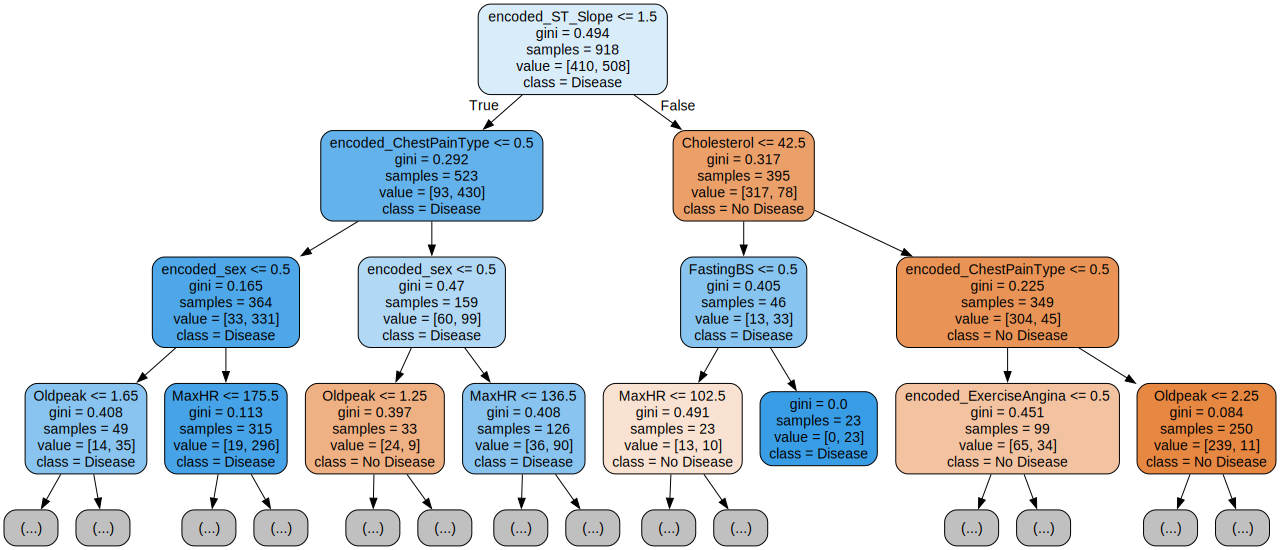

In [25]:
display(graphviz.Source(dot_graph))

In [26]:
Decision_Tree = graphviz.Source(dot_graph)

In [28]:
Decision_Tree.format = 'png'
Decision_Tree.render('Decision_Tree')

'Decision_Tree.png'

In [29]:
new_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,encoded_sex,encoded_ChestPainType,encoded_RestingECG,encoded_ExerciseAngina,encoded_ST_Slope,encoded_HeartDisease
0,40,140,289,0,172,0.0,1,1,1,0,2,0
1,49,160,180,0,156,1.0,0,2,1,0,1,1
2,37,130,283,0,98,0.0,1,1,2,0,2,0
3,48,138,214,0,108,1.5,0,0,1,1,1,1
4,54,150,195,0,122,0.0,1,2,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,3,1,0,1,1
914,68,144,193,1,141,3.4,1,0,1,0,1,1
915,57,130,131,0,115,1.2,1,0,1,1,1,1
916,57,130,236,0,174,0.0,0,1,0,0,1,1


In [35]:
newer_df = new_df.drop(['Cholesterol', 'MaxHR', 'FastingBS'], axis='columns')

In [36]:
newer_df


,Age,RestingBP,Oldpeak,encoded_sex,encoded_ChestPainType,encoded_RestingECG,encoded_ExerciseAngina,encoded_ST_Slope,encoded_HeartDisease
0,40,140,0.0,1,1,1,0,2,0
1,49,160,1.0,0,2,1,0,1,1
2,37,130,0.0,1,1,2,0,2,0
3,48,138,1.5,0,0,1,1,1,1
4,54,150,0.0,1,2,1,0,2,0
...,...,...,...,...,...,...,...,...,...
913,45,110,1.2,1,3,1,0,1,1
914,68,144,3.4,1,0,1,0,1,1
915,57,130,1.2,1,0,1,1,1,1
916,57,130,0.0,0,1,0,0,1,1


In [37]:
newer_X = newer_df[['Age', 'encoded_sex', 'encoded_ChestPainType', 'encoded_RestingECG', 'encoded_ExerciseAngina', 'Oldpeak', 'encoded_ST_Slope']]
newer_y = newer_df['encoded_HeartDisease']

In [38]:
modelCART = tree.DecisionTreeClassifier()

In [39]:
modelCART.fit(newer_X, newer_y)

DecisionTreeClassifier()

In [40]:
features_names2 = [i for i in newer_X.columns]
newer_y_str = newer_y.astype('str')
newer_y_str[newer_y_str=='0']="No Disease"
newer_y_str[newer_y_str=='1']="Disease"
newer_y_str=newer_y_str.values

In [42]:
export_graphviz(modelCART, out_file = 'DecisionTreeHealthCART.dot', feature_names = features_names2, class_names=newer_y_str, filled = True, rounded =  True, max_depth = 3)

In [43]:
with open("DecisionTreeHealthCART.dot") as pic2:
    dot_graph2 = pic2.read()

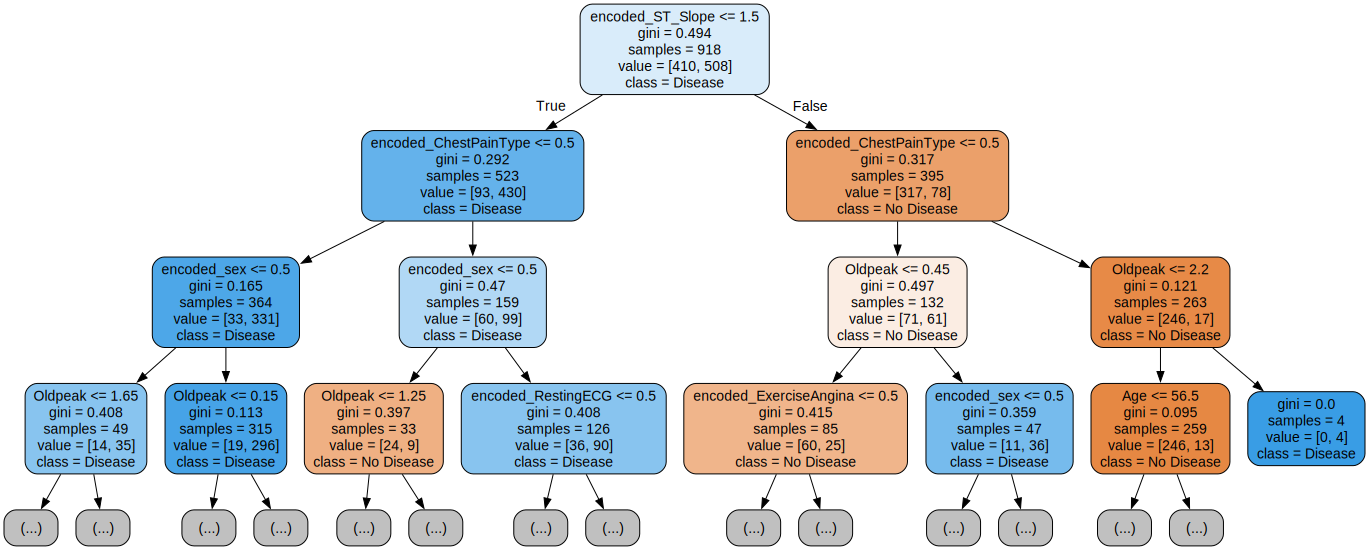

In [44]:
display(graphviz.Source(dot_graph2))

In [45]:
Decision_Tree2 = graphviz.Source(dot_graph2)

In [46]:
Decision_Tree2.format = 'png'
Decision_Tree2.render('Decision_TreeCART')

'Decision_TreeCART.png'